In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread, imsave
from csbdeep.utils import Path, normalize

from stardist import random_label_cmap
from stardist.models import StarDist3D

np.random.seed(6)
lbl_cmap = random_label_cmap()

Using TensorFlow backend.
/home/prakash/anaconda3/envs/StarDistNewVersion/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/prakash/anaconda3/envs/StarDistNewVersion/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/prakash/anaconda3/envs/StarDistNewVersion/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

# Data

We assume that data has already been downloaded in via notebook [1_data.ipynb](1_data.ipynb).  
We now load images from the sub-folder `test` that have not been used during training.

In [2]:
X = sorted(glob('/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/*.tif'))
print(X)
X = list(map(imread,X))

n_channel = 1 if X[0].ndim == 3 else X[0].shape[-1]
axis_norm = (0,1,2)   # normalize channels independently
# axis_norm = (0,1,2,3) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

['/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish1-RR-100uM-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish1-RR-50uM-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish1-RR-control-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish2-RR-100uM-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish2-RR-50uM-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish2-RR-control-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish3-RR-100uM-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/fish3-RR-50uM-medium.tif', '/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IG

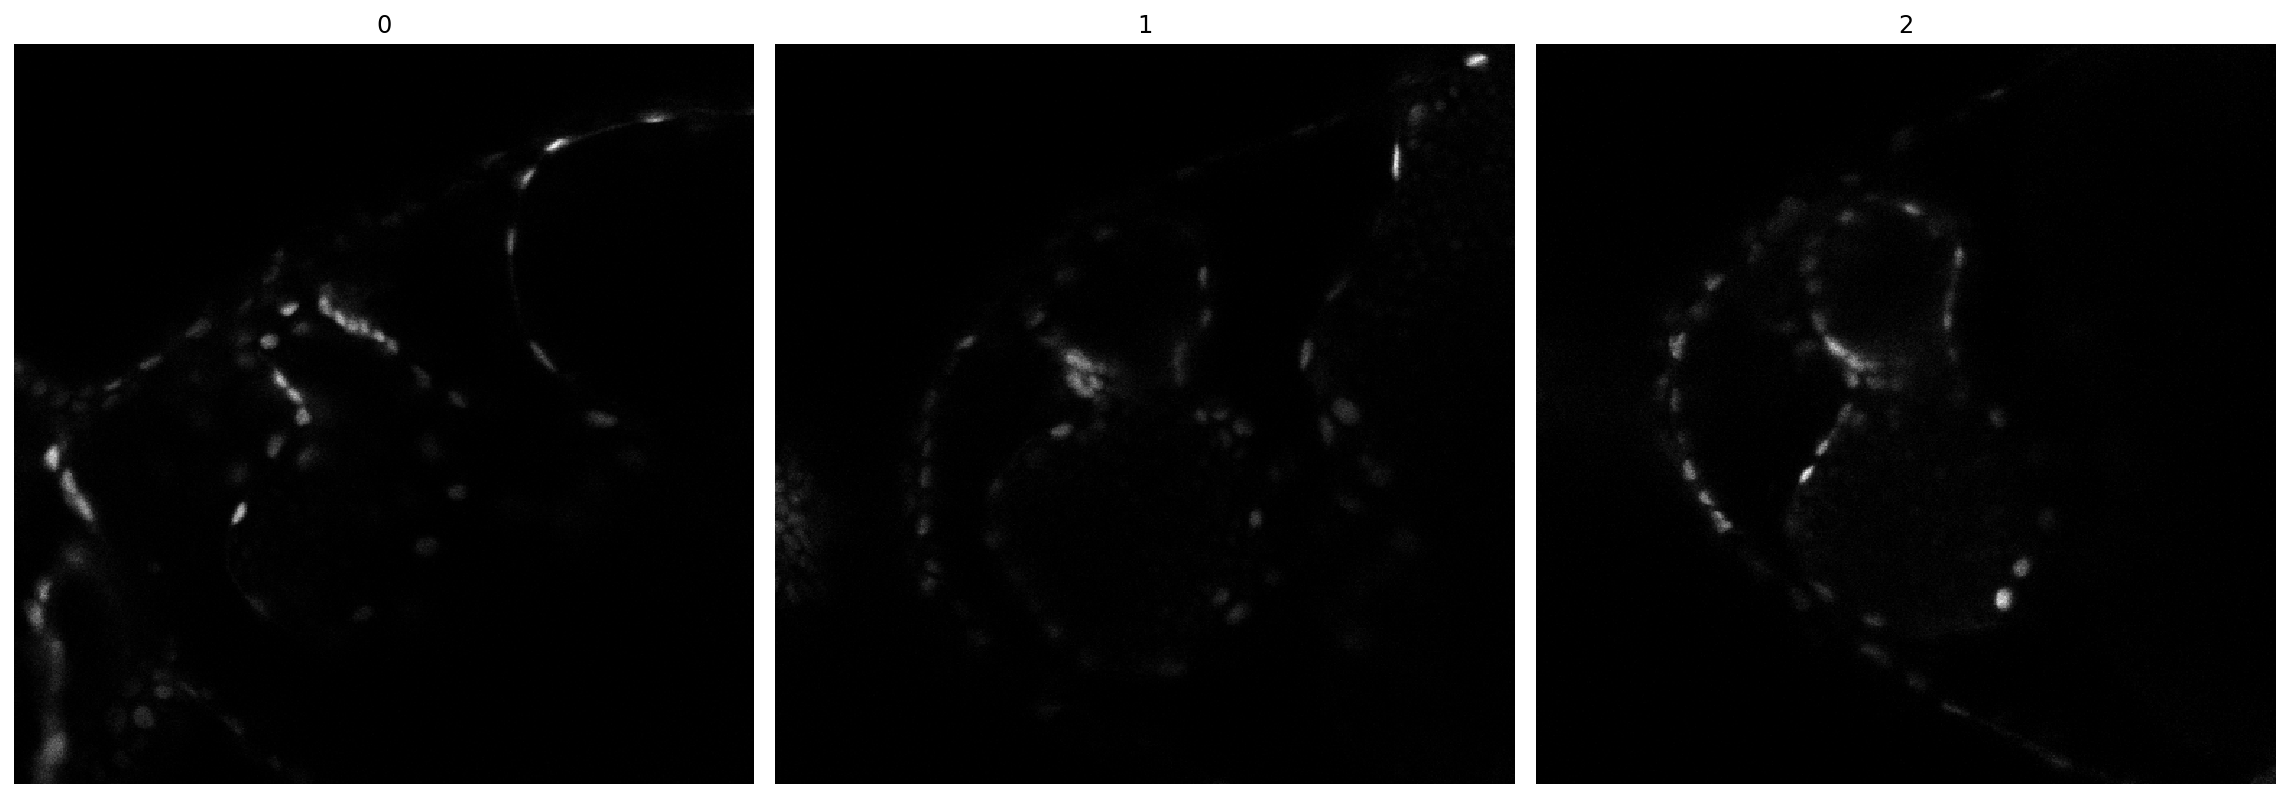

In [3]:
# show all test images
if True:
    fig, ax = plt.subplots(1,3, figsize=(16,16))
    for i,(a,x) in enumerate(zip(ax.flat, X)):
        a.imshow(x[x.shape[0]//2],cmap='gray')
        a.set_title(i)
    [a.axis('off') for a in ax.flat]
    plt.tight_layout()
None;

# Load trained model

If you trained your own StarDist model (and optimized its thresholds) via notebook [2_training.ipynb](2_training.ipynb), then please set `demo_model = False` below.

In [4]:
demo_model = False

if demo_model:
    print (
        "NOTE: This is loading a previously trained demo model!\n"
        "      Please set the variable 'demo_model = False' to load your own trained model.",
        file=sys.stderr, flush=True
    )
    model = StarDist3D(None, name='3D_demo', basedir='../../models/examples')
else:
    model = StarDist3D(None, name='stardist_fish_5gt', basedir='models')
None;

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


## Prediction

Make sure to normalize the input image beforehand or supply a `normalizer` to the prediction function.

Calling `model.predict_instances` will
- predict object probabilities and star-convex polygon distances (see `model.predict` if you want those)
- perform non-maximum suppression (with overlap threshold `nms_thresh`) for polygons above object probability threshold `prob_thresh`.
- render all remaining polygon instances in a label image
- return the label instances image and also the details (coordinates, etc.) of all remaining polygons

In [5]:
predictions = []
for i in range(len(X)):
    print('Processing image:', i)
    img = normalize(X[i], 1,99.8, axis=axis_norm)
    labels, details = model.predict_instances(img, n_tiles = (4,4,4))
    predictions.append(labels)

Processing image: 0


100%|██████████| 64/64 [00:49<00:00,  1.30it/s]


Processing image: 1


100%|██████████| 64/64 [00:50<00:00,  1.28it/s]


Processing image: 2


100%|██████████| 64/64 [00:33<00:00,  1.89it/s]


Processing image: 3


100%|██████████| 64/64 [00:27<00:00,  2.34it/s]


Processing image: 4


100%|██████████| 64/64 [00:39<00:00,  1.60it/s]


Processing image: 5


100%|██████████| 64/64 [00:33<00:00,  1.92it/s]


Processing image: 6


100%|██████████| 64/64 [00:37<00:00,  1.69it/s]


Processing image: 7


100%|██████████| 64/64 [00:28<00:00,  2.26it/s]


Processing image: 8


100%|██████████| 64/64 [00:53<00:00,  1.19it/s]


Processing image: 9


100%|██████████| 64/64 [00:25<00:00,  2.55it/s]


Processing image: 10


100%|██████████| 64/64 [00:28<00:00,  2.25it/s]


Processing image: 11


100%|██████████| 64/64 [00:31<00:00,  2.03it/s]


Processing image: 12


100%|██████████| 64/64 [00:43<00:00,  1.48it/s]


Processing image: 13


100%|██████████| 64/64 [00:28<00:00,  2.24it/s]


Processing image: 14


100%|██████████| 64/64 [00:28<00:00,  2.21it/s]


Processing image: 15


100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


Processing image: 16


100%|██████████| 64/64 [00:28<00:00,  2.24it/s]


Processing image: 17


100%|██████████| 64/64 [00:28<00:00,  2.28it/s]


Processing image: 18


100%|██████████| 64/64 [00:28<00:00,  2.21it/s]


Processing image: 19


100%|██████████| 64/64 [00:30<00:00,  2.09it/s]


Processing image: 20


100%|██████████| 64/64 [00:26<00:00,  2.39it/s]


Processing image: 21


100%|██████████| 64/64 [00:29<00:00,  2.16it/s]


In [6]:
names = sorted(glob('/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/Ruthenium_Red/*.tif'))
outpath = "/home/prakash/Desktop/fileserver_project_jug_vermot/Helene_IGBMC/16082021/results/Ruthenium_Red/"
for i in range(len(X)):
    print(i)
    imsave(outpath+names[i].split('/')[-1], predictions[i])
#     imsave(outpath+'fish3-32hpf.tif', predictions[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


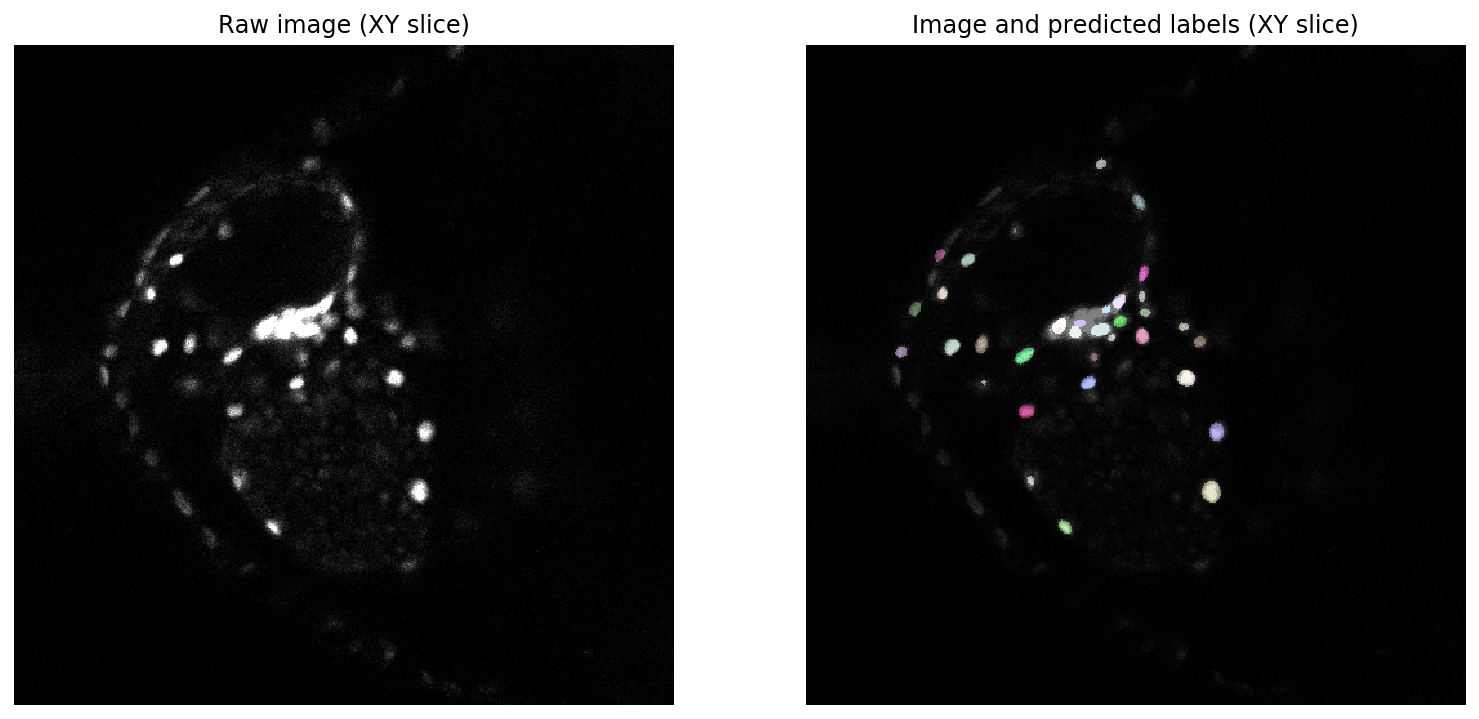

In [8]:
plt.figure(figsize=(13,10))
z = max(0, img.shape[0] // 2 - 5)
plt.subplot(121)
plt.imshow((img if img.ndim==3 else img[...,:3])[z], clim=(0,1), cmap='gray')
plt.title('Raw image (XY slice)')
plt.axis('off')
plt.subplot(122)
plt.imshow((img if img.ndim==3 else img[...,:3])[z], clim=(0,1), cmap='gray')
plt.imshow(labels[z], cmap=lbl_cmap, alpha=0.5)
plt.title('Image and predicted labels (XY slice)')
plt.axis('off');

# Example results

In [8]:
def example(model, i, show_dist=True):
    img = normalize(X[i], 1,99.8, axis=axis_norm)
    labels, details = model.predict_instances(img)

    plt.figure(figsize=(13,8))
    z = img.shape[0] // 2
    y = img.shape[1] // 2
    img_show = img if img.ndim==3 else img[...,:3]    
    plt.subplot(221); plt.imshow(img_show[z],   cmap='gray', clim=(0,1)); plt.axis('off'); plt.title('XY slice')
    plt.subplot(222); plt.imshow(img_show[:,y], cmap='gray', clim=(0,1)); plt.axis('off'); plt.title('XZ slice')
    plt.subplot(223); plt.imshow(img_show[z],   cmap='gray', clim=(0,1)); plt.axis('off'); plt.title('XY slice')
    plt.imshow(labels[z], cmap=lbl_cmap, alpha=0.5)
    plt.subplot(224); plt.imshow(img_show[:,y], cmap='gray', clim=(0,1)); plt.axis('off'); plt.title('XZ slice')
    plt.imshow(labels[:,y], cmap=lbl_cmap, alpha=0.5)
    plt.tight_layout()
    plt.show()

In [9]:
example(model, 0)

ResourceExhaustedError: OOM when allocating tensor with shape[1,174,1024,1024,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv3d_1/convolution}} = Conv3D[T=DT_FLOAT, data_format="NDHWC", dilations=[1, 1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1, 1], _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_input_0_0/_217, conv3d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node prob/Sigmoid/_219}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_213_prob/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


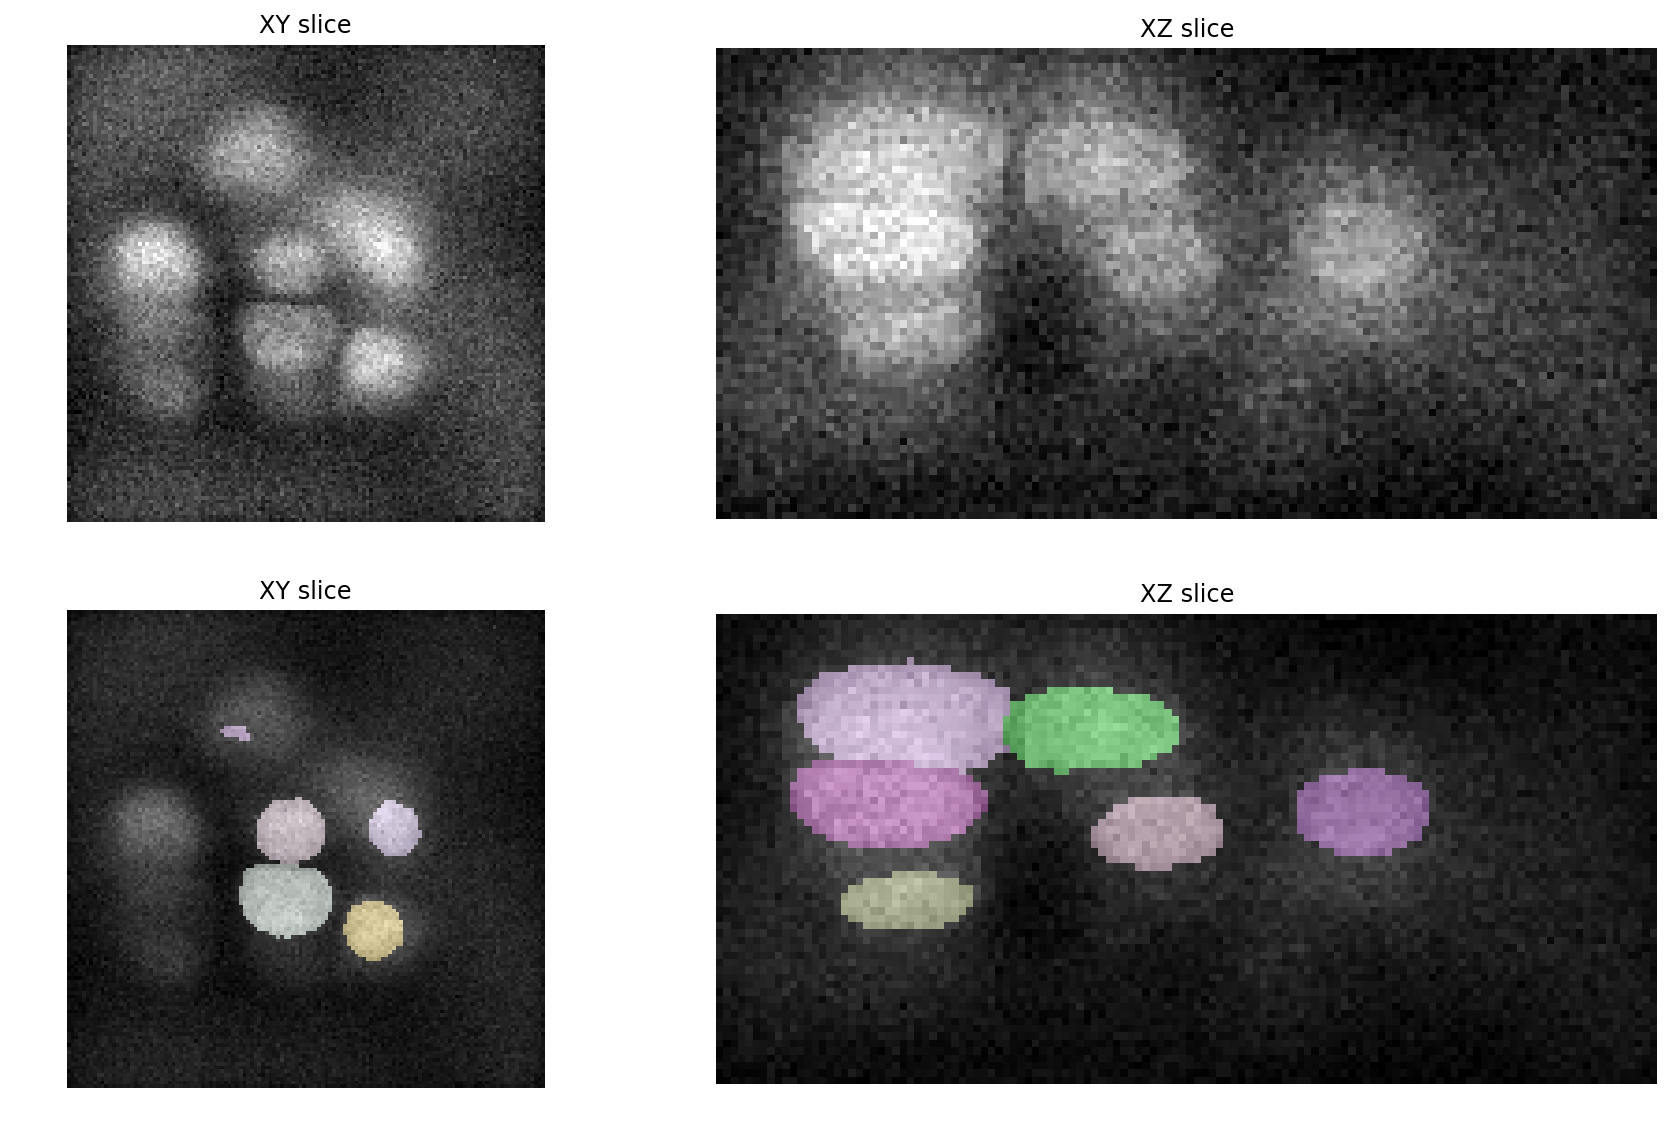

In [9]:
example(model, 1)

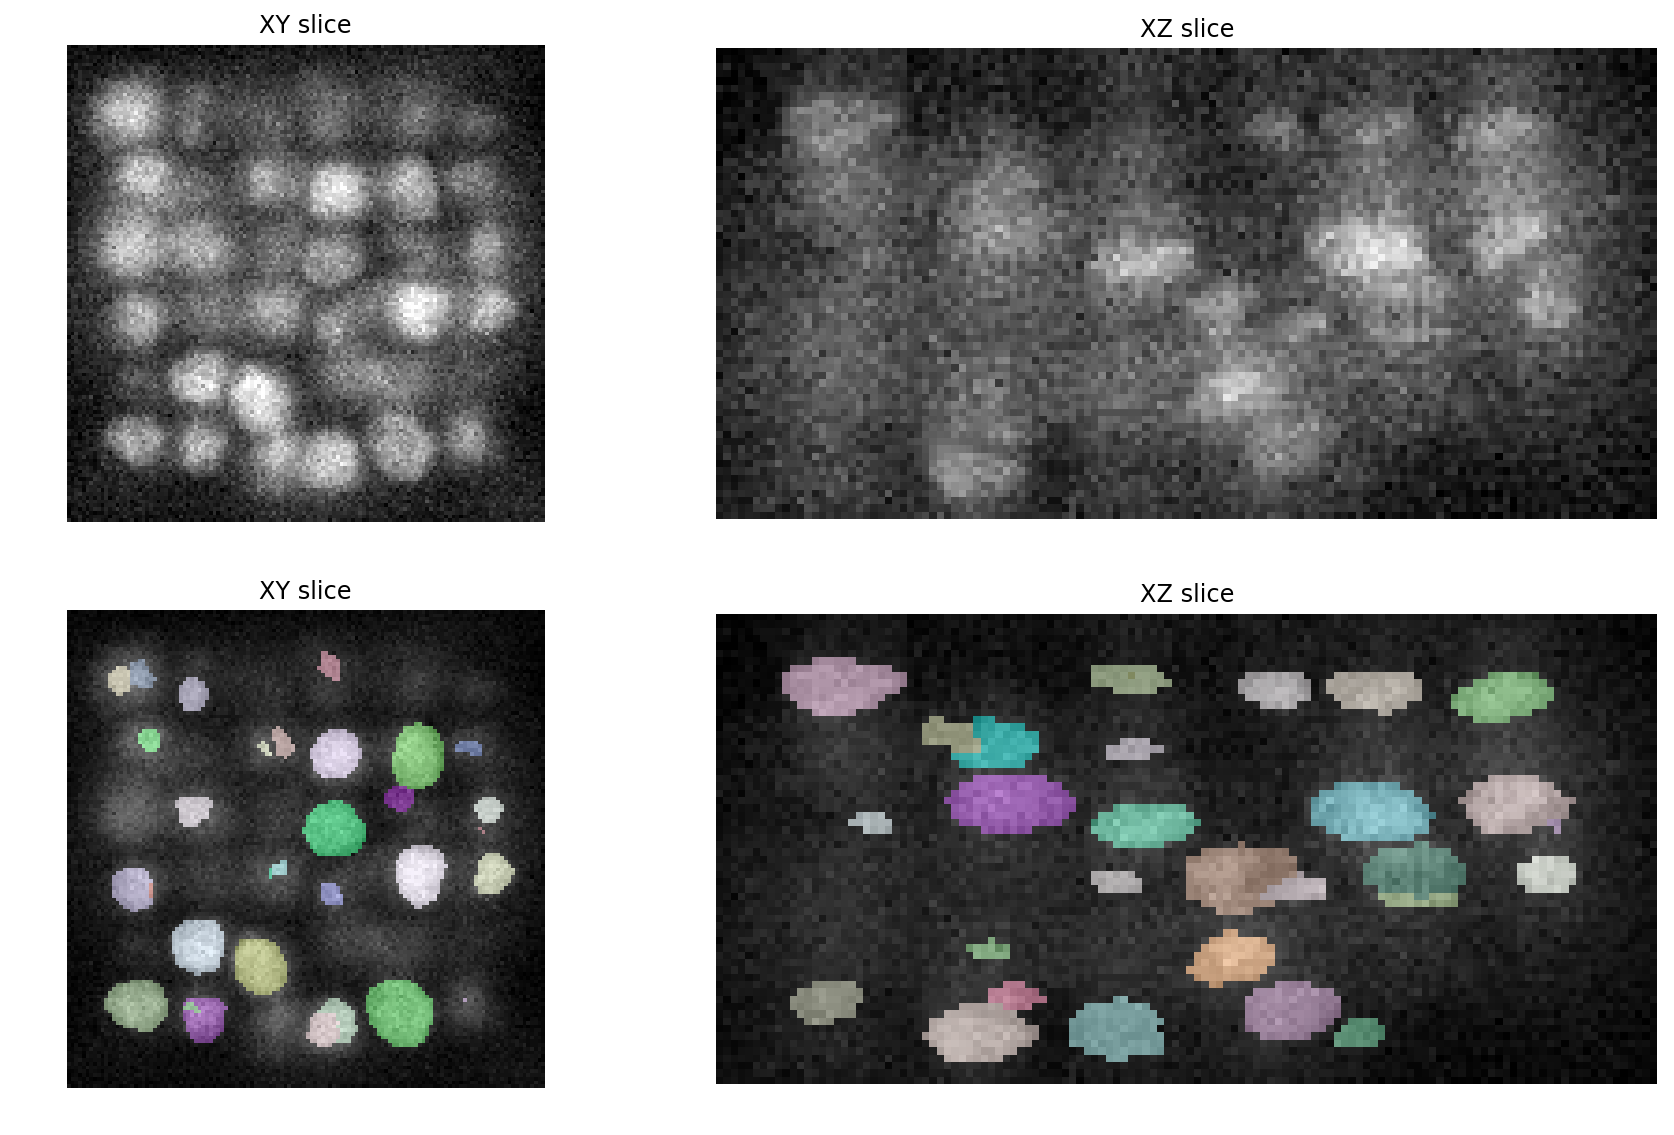

In [10]:
example(model, 2)